## Описание проекта
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.
Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

## Инструкция по выполнению проекта
Загрузите и подготовьте данные. Поясните порядок действий. \
Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы. \
Улучшите качество модели, учитывая дисбаланс классов. \
Обучите разные модели и найдите лучшую. Кратко опишите выводы. \
Проведите финальное тестирование.

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.utils import shuffle

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [ ]:
try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Сhurn.csv')


In [ ]:
df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.0,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [ ]:
#Запросим информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Промежуточный вывод и дальнейшие шаги
Таблица состоит из 10000 строк и 14 столбцов
пропуски есть только в столбце  Tenure
RowNumber - дублирует номера строк и для обучения только будут вносить путаницу \
Surname -  не носит никакого смысла (отсутсвует столбец Name((хоть какая- то логика была бы)) \
считаю необходимым привеси впорядок наименование столбцов (привести к нижнему регистру) \
и потом рассмотреть соответствие типов данных в столбцах \
Начнем по порядку \
Удалим лишнее и рассмотрим Tenure

In [ ]:
df.drop(['RowNumber','Surname', 'CustomerId'],axis = 1, inplace = True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Двояко выглядит и столбец CustomerId \
По моему мнению можно было-бы предсказывать "уйдет/не уйдет" с привязкой к ID конкретного пользователя \
Но задача стоит немного другая, да и воссатновить првязк мы всегда можем \
не нагрузим лишней информацией при обучении \
Удалим и его

In [ ]:
df.columns = df.columns.str.lower()
df

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


После приведения к нижнему регистру название некоторых столбцов стали нечитаемы \
разделим нижним подчеркиванием

In [ ]:
df = df.rename({'creditscore': 'credit_score',
          'numofproducts': 'num_of_products',
          'hascrcard' : 'has_cr_card',
          'isactivemember': 'is_active_member',
          'estimatedsalary': 'estimated_salary'}, axis =1)
df

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [ ]:
df[df['tenure'].isnull()]

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


 и так мы получили 909 строк с пропусками NaN, что составляет 9% \
 достаточно много данных, которые удалять нельзя, надо их заполнить \
 по моему мнению логично их заполнить случайными числами \
 на самом деле я изначально думал заполнять средним, но отказался от идеи по причине похожести  значений в 9% данных

In [ ]:
df['tenure'] = df['tenure'].fillna(-1)

df.loc[(df['tenure'] == -1), 'tenure'] = df['tenure'].apply(lambda v: int(random.random() * 10))

убедились, что пропуски заполнены

In [ ]:
df['tenure'].isna().sum()

0

In [ ]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


проверим дубликаты


In [ ]:
df.duplicated().sum()

0

Считаю, что всегда из DATAFRAME нужно анализировать значения данных живущих в некоторых выборочных столбцах \
Например, интересно сколько стран, возраст пользователей банковскими услугами \
Также мы проверим, что у нас нет ничего лишнего, кроме (0,1) в столбцах has_cr_card, is_active_member, exited

In [ ]:
df['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [ ]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [ ]:
df['has_cr_card'].value_counts()

1    7055
0    2945
Name: has_cr_card, dtype: int64

In [ ]:
df['is_active_member'].value_counts()

1    5151
0    4849
Name: is_active_member, dtype: int64

In [ ]:
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [ ]:
df['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [ ]:
#Столбец age я считаю необходимым сдлать целочисленным
df['age'] = df['age'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int32  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int32(1), int64(5), object(2)
memory usage: 820.4+ KB


Ранее я говорил,что поменяем данные,но не вижу в этом необходимости(возможно пока)


Столбец Gender нужно перевести из классификации в регрессию

In [ ]:
df.loc[(df['gender'] == 'Female'), 'gender'] = 0
df.loc[(df['gender'] == 'Male'), 'gender'] = 1

In [ ]:
df

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3.0,75075.31,2,1,0,92888.52,1


### Подготовка к обучению


In [ ]:
df.corr()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
credit_score,1.000000,-0.003965,-0.006703,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.010439,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.006703,-0.010439,1.000000,-0.003087,0.009750,0.027923,-0.029186,0.011150,-0.019835
balance,0.006268,0.028308,-0.003087,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_of_products,0.012238,-0.030680,0.009750,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_cr_card,-0.005458,-0.011721,0.027923,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
is_active_member,0.025651,0.085472,-0.029186,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.011150,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.019835,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

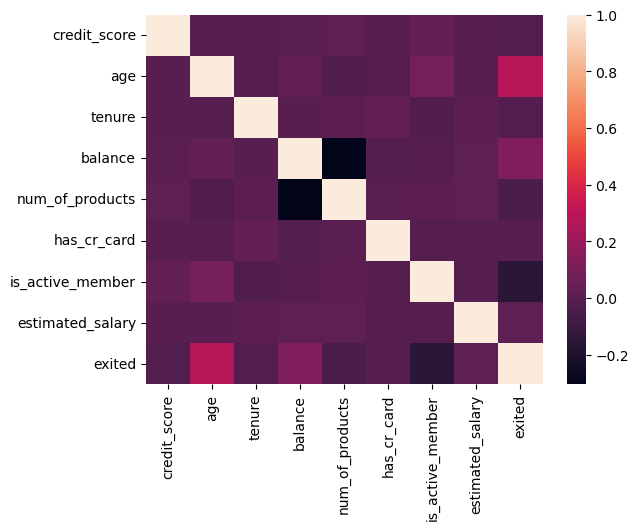

In [ ]:
#Проверим корреляцию признаков

sns.heatmap(df.corr())

Корреляция между признаками очень слабая, кроме age & exited (прямая корреляция) \
и num_of_product & balance (обратная корреляция)

### OHE

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head(15)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_1
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>

Все верно, в дамми-ловушку не попались. Можно было бы выше не обрабатывать колонку с гендером, тогда здесь получили бы тот же результат.
    
</div>


Теперь нам предстоит масштабировать признаки, что бы избежать автоматического определения важности признака т.к. для нас все признаки важны \
для этого будем использовать StandardScaler

In [ ]:
features = df.drop(['exited'], axis = 1)
target = df['exited']

In [ ]:
features_train, features_valid,target_train, target_valid = train_test_split(
    features, target, test_size= 0.4, random_state=12345)

In [ ]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid,test_size= 0.5, random_state=12345)


### StandardScaler

scaler = StandardScaler()
ss = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(df[ss])
df[ss] = scaler.transform(df[ss])
df.head()33

In [ ]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


In [ ]:
#features_train, features_valid, target_train, target_valid = train_test_split(
   # features, target, test_size= 0.3, random_state=12345)

### Перейдем к машинному обучению

Начнем с дерева решений

In [ ]:
best_model = None
best_depth = 0
best_roc = 0
best_auc = 0
best_f1 = 0

for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predictions_valid)

    if f1_valid > best_f1:
        best_model = model
        best_depth = depth
        best_f1 = f1_valid
        best_roc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

print("F1 лучшей модели", best_f1, "ROC лучшей модели", best_roc, "Глубина дерева:", best_depth)

F1 лучшей модели 0.5710186513629841 ROC лучшей модели 0.7858012388170749 Глубина дерева: 9


Рассмотрим случайный лес

In [ ]:
best_model = None
best_depth = 0
best_roc = 0
best_auc = 0
best_f1 = 0
for est in range(1, 30):
    for depth in range (1, 30):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)

        model.fit(features_train, target_train)

        predictions_valid = model.predict(features_valid)

        f1_valid = f1_score(target_valid, predictions_valid)

        if f1_valid > best_f1:
            best_model = model
            best_f1 = f1_valid
            best_roc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])
            best_depth = depth
            best_est = est
print("F1 лучшей модели", best_f1, "ROC лучшей модели", best_roc, "Глубина дерева:", best_depth)

F1 лучшей модели 0.6074498567335244 ROC лучшей модели 0.8381311283034618 Глубина дерева: 15



<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>

С увеличением количества деревьев качество модели должно увеличиваться постепенно, поэтому здесь можно взять больший диапазон, но зато поставить шаг обучения:
    
`for est in range(1, 150, 15):`
    
С глубиной такого нет, там 6 может быть отличным вариантом, а 7 так себе, и 8 вновь хорошим. Поэтому по глубине у тебя все оптимально с подбором.
       
</div>
  


и последняя Логистическая регрессия


In [ ]:
model = LogisticRegression(random_state=12345)

model.fit(features_train, target_train)

predictions_valid = model.predict(features_valid)

f1_valid = f1_score(target_valid, predictions_valid)
roc_valid = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])
print("F1 модели", f1_valid, "ROC модели", roc_valid)

F1 модели 0.3400673400673401 ROC модели 0.7592094677562773


### Вывод
Лучший результат показывает **Случайный лес**

### Проверим баланс классов


Для подсчёта классов в целевом признаке примените метод **value_counts()** с параметром Normаlize =True

In [ ]:
target_train.value_counts(normalize = True)

0    0.800667
1    0.199333
Name: exited, dtype: float64

In [ ]:
target_valid.value_counts(normalize = True)


0    0.791
1    0.209
Name: exited, dtype: float64

Классы являются сбалансированными, когда значения  0 и 1 соотносятся 1:1
значит у нас дисбаланс и нам нужно улучшить качество

### Увеличим выборку

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train,4)


In [ ]:
best_model = None
best_depth = 0
best_roc = 0
best_auc = 0
best_f1 = 0
best_est = 0
for est in range(1, 30):
    for depth in range (1, 30):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)

        model.fit(features_upsampled, target_upsampled)

        predictions_valid = model.predict(features_valid)

        f1_valid = f1_score(target_valid, predictions_valid)

        if f1_valid > best_f1:
            best_model = model
            best_f1 = f1_valid
            best_roc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])
            best_depth = depth
            best_est = est
print("F1 лучшей модели", best_f1, "ROC лучшей модели", best_roc, "Глубина дерева:", best_depth,'Кол-во деревьев', best_est )

F1 лучшей модели 0.6332665330661322 ROC лучшей модели 0.8544684821466377 Глубина дерева: 7 Кол-во деревьев 19


## А вот это уже неправда :)
***f1=1,а это значит, что соотношение полноты и точности равно 1:1.***
### f1 теперь 0,64, что говорит об увеличении (было 0,57)

### Взвешивание классов

In [ ]:
best_model = None
best_depth = 0
best_roc = 0
best_auc = 0
best_f1 = 0
best_est = 0
for est in range(1, 30):
    for depth in range (1, 30):
        model = RandomForestClassifier(random_state=12345, max_depth = depth) #class_weight='balanced'))
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        f1_valid = f1_score(target_valid, predictions_valid)
        if f1_valid > best_f1:
            best_model = model
            best_f1 = f1_valid
            best_roc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])
            best_depth = depth
            best_est = est


print("F1 лучшей модели", best_f1, "ROC лучшей модели", best_roc, "Глубина дерева:", best_depth, 'Кол-во деревьев', best_est )

F1 лучшей модели 0.5985185185185184 ROC лучшей модели 0.837015860245949 Глубина дерева: 21 Кол-во деревьев 1


### Уменьшение выборки

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)



In [ ]:
best_model = None
best_depth = 0
best_roc = 0
best_auc = 0
best_f1 = 0
best_est = 0
for est in range(1, 30):
    for depth in range (1, 30):
        model = RandomForestClassifier(random_state=12345, max_depth = depth) #class_weight='balanced')
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        f1_valid = f1_score(target_valid, predictions_valid)
        if f1_valid > best_f1:
            best_model = model
            best_f1 = f1_valid
            best_roc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])
            best_depth = depth
            best_est = est


print("F1 лучшей модели", best_f1, "ROC лучшей модели", best_roc, "Глубина дерева:", best_depth,'Кол-во деревьев', best_est)

F1 лучшей модели 0.6168051708217912 ROC лучшей модели 0.8643547212846766 Глубина дерева: 8


### Вывод: Наилучший результат метрики f1_score модель показывает при глубине дерева 9.
F1 лучшей модели 0.6418219461697723\
ROC лучшей модели 0.8583711370596616\
Глубина дерева: 9\
Кол-во деревьев 17

### Протестируем модель

In [ ]:
model_finally = RandomForestClassifier(random_state=12345, n_estimators=17, max_depth=9)

model_finally.fit(features_upsampled, target_upsampled)
predictions_finally = model_finally.predict(features_test)
probabilities_finally = model_finally.predict_proba(features_test)

accuracy_finally = accuracy_score(target_test, predictions_finally)
f1_finally = f1_score(target_test, predictions_finally)
roc_auc_finally = roc_auc_score(target_test, probabilities_finally[:,1])

print('Accuracy', accuracy_finally,'F1 score', f1_finally,'Roc_auc', roc_auc_finally)
print('Качество модели не ухудшилось')
print()

Accuracy 0.808 F1 score 0.6 Roc_auc 0.847645902759976
Качество модели не ухудшилось



### Построим ROC-кривую

In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=17,max_depth = 9)#class_weight='balanced')
model.fit(features_test, target_test)


RandomForestClassifier(max_depth=9, n_estimators=17, random_state=12345)

Text(0.5, 1.0, 'ROC-кривая')

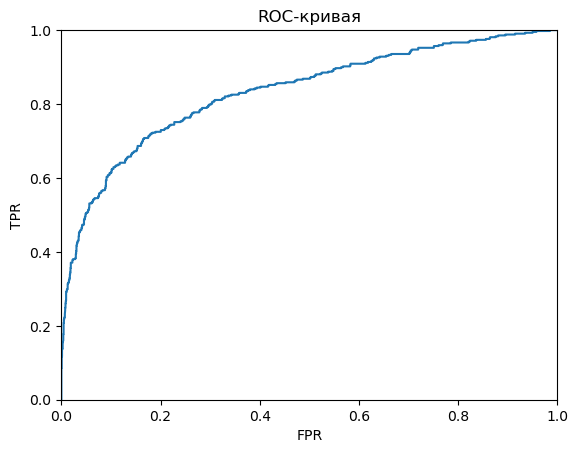

In [ ]:
probabilities_valid = model.predict_proba(features_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')

### Вывод:
Перед проведением машинного обучения мы подготовили данные, отбросили лишнее и максимально перевели показатели классификации в регрессию, оценили корреляцию данных в DF \
Нашей целью было показать качество модели F1>0.59 на тестовой выборке и нам этого удалось достичь \
**наилучший результат у RandomForestClassifier** \
F1 лучшей модели 0.6437684003925417 \
ROC лучшей модели 0.86233364251248 \
Max_depth(Глубина дерева): 6 \
Кол-во деревьев 8 \
**худший показала LogisticRegression** \
применили несколько способов борьбы с дисбалансом (взвешивание классов, увеличение выборки, уменьшение выборки ) \
проверили, как преобразование данных влияет на способность модели предсказывать уход клиентов. \
наилучший показатель таких метрик как f1_score и roc_auc_score был достигнут на данных преобразованных при помощи увеличение выборки